In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from sklearn.metrics import matthews_corrcoef

In [2]:
# работа с визуализацией
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn import preprocessing

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

> Датасет содержит следующие признаки:

* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [ ]:
df = pd.read_csv('Data\wine_cleared.zip')
# для удобства сразу преобразуем признак в int
df['price_round'] = df['price'].round().astype(int)
# регулярное выражение для нахождения чисел regex = '\d{4}' 
df['year'] = df['title'].str.findall(r'\d{4}').str.get(0)
# Создаем новый бинарный признак 'is_usa'
df['is_usa'] = df['country'].apply(lambda x: 1 if x == 'US' else 0)
# Создаем новый бинарный признак 'is_france'
df['is_france'] = df['country'].apply(lambda x: 1 if x == 'France' else 0)
# Создаем новый бинарный признак 'is_italy'
df['is_italy'] = df['country'].apply(lambda x: 1 if x == 'Italy' else 0)
# Преобразуем признак 'year' в целочисленный тип 'int64'
#df['year'] = df['year'].apply(lambda x: int(x) if type(x) == str else x)
df['year'] = df['year'].astype('Int64')
# Создаем новый бинарный признак old_wine
#df['old_wine'] = df['year'].apply(lambda x: 1 if x < 2010 else 0)
#новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
regex = '((.*?))'
df['locality'] = df['title'].str.findall(regex)

In [3]:
df = pd.read_csv('Data\heart.zip')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\HP\AppData\Local\Temp\ipykernel_31768\1076429982.py:1: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv('Data\heart.zip')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


$$ Задание $$
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [7]:
# Создаем новый бинарный признак old_wine
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [9]:
df['old'].sum()

79

$$ Задание $$
Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

In [10]:
def get_trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] <= 20:
            return '123'
        elif row['age'] > 20 and row['age'] <= 30:
            return '126'
        elif row['age'] > 30 and row['age'] <= 40:
            return '129'
        elif row['age'] > 40 and row['age'] <= 50:
            return '135'
        return '142'
    else:
        if row['age'] <= 20:
            return '116'
        elif row['age'] > 20 and row['age'] <= 30:
            return '120'
        elif row['age'] > 30 and row['age'] <= 40:
            return '127'
        elif row['age'] > 40 and row['age'] <= 50:
            return '137'
        elif row['age'] > 50 and row['age'] <= 60:
            return '144'
        return '159'
# и далее по остальным условиям

In [15]:
df['trestbps_mean'] = df[['sex', 'age']].apply(get_trestbps_mean, axis = 1).astype(int)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [16]:
#В ответ напишите значение признака trestbps_mean для пациента под номером 300.
df['trestbps_mean'][300]

142

$$ Задание $$
Проанализируйте датасет и выберите категориальные признаки.

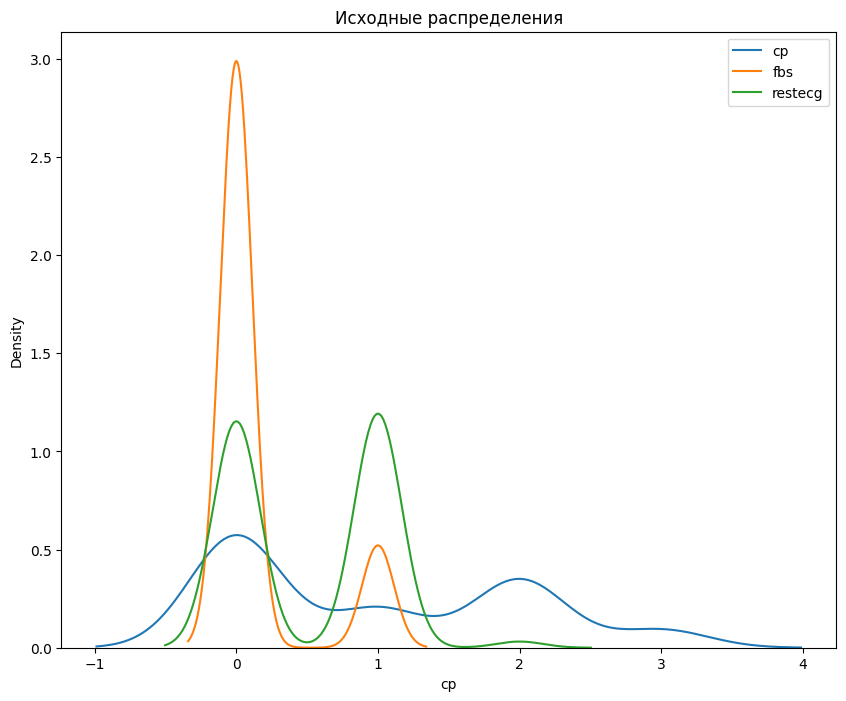

In [29]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
#sns.kdeplot(df['sex'], ax=ax1, label ='sex')
sns.kdeplot(df['cp'], ax=ax1, label ='cp')
sns.kdeplot(df['fbs'], ax=ax1, label ='fbs')
sns.kdeplot(df['restecg'], ax=ax1, label ='restecg')
#sns.kdeplot(df['exang'], ax=ax1, label ='exang')
#sns.kdeplot(df['slope'], ax=ax1, label ='slope')
#sns.kdeplot(df['ca'], ax=ax1, label ='ca')
#sns.kdeplot(df['thal'], ax=ax1, label ='thal')
#sns.kdeplot(df['target'], ax=ax1, label ='target')
plt.legend()

$$ Задание $$
Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).

In [49]:
encoded_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = ce.OneHotEncoder(cols=encoded_cols, use_cat_names=True)
type_bin = encoder.fit_transform(df[encoded_cols])
data = pd.concat([df, type_bin], axis=1)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

$$ Задание $$
Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию.

Сколько признаков получилось в датасете?

In [51]:
len([column for column in data])

35

$$ Задание $$
Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [79]:
col_names = list(df.columns)

In [84]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(df.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(df)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
round(heart_r['chol'].std(), 6)


0.816232

In [85]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

round(df_mm['chol'].std(), 6)


0.118335

$$ Задание $$
Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

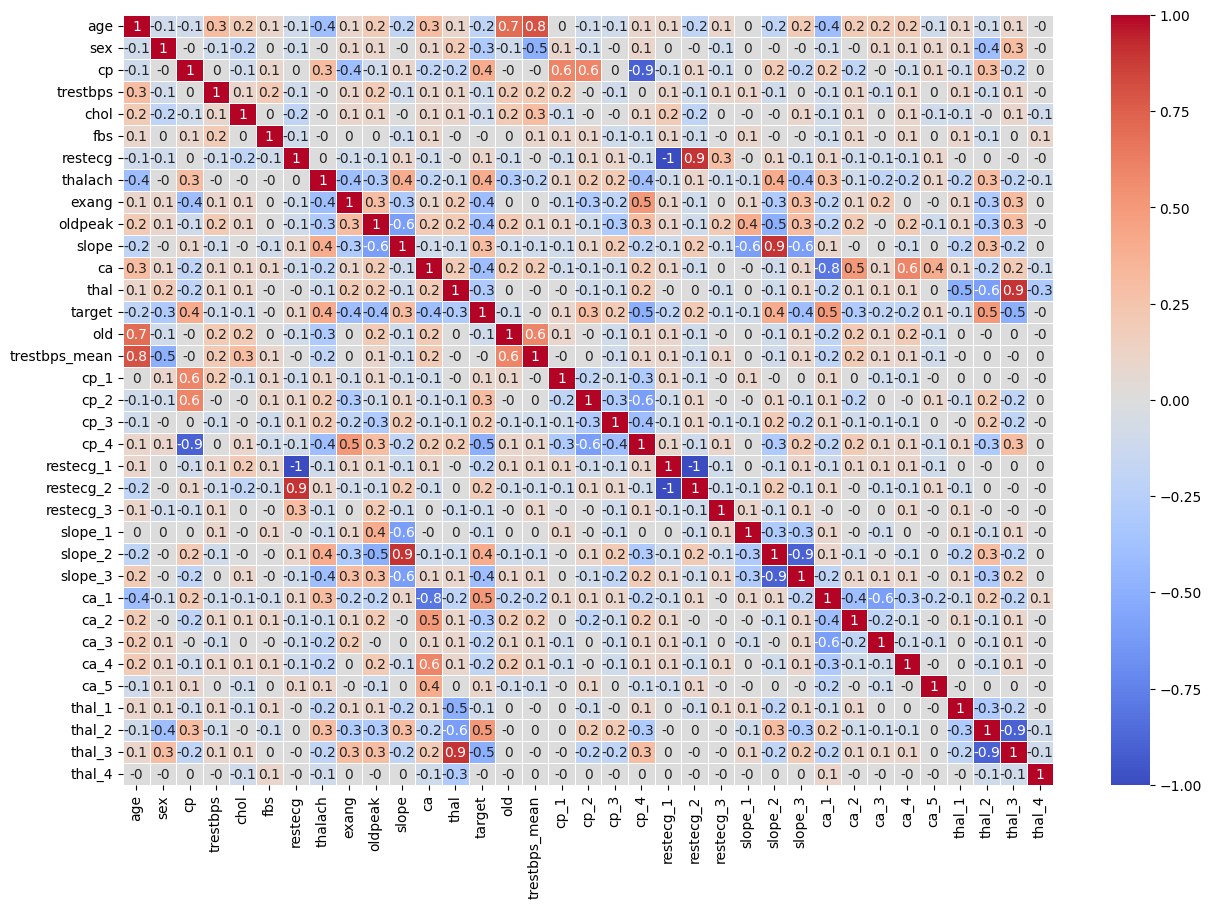

In [75]:
data = df.copy()
encoded_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = ce.OneHotEncoder(cols=encoded_cols)
type_bin = encoder.fit_transform(data[encoded_cols])
data = pd.concat([data, type_bin], axis=1)

r_scatter = preprocessing.RobustScaler()
r_data = r_scatter.fit_transform(data)
r_data = pd.DataFrame(r_data, columns=data.columns)

cor_list = [['age', 'old'], ['ca', 'ca_1'], ['age', 'cp'], ['slope', 'slope_3'], ['slope_2', 'slope_3'], 
            ['thal_2', 'thal_3'], ['cp', 'ca'], ['cp', 'cp_4'], ['thal_3', 'thal'], ['restecg_2', 'restecg'], 
            ['slope_2', 'slope'], ['restecg_1', 'restecg_2'], ['restecg_1', 'restecg'], ['restecg', 'restecg_2']
]
cor_list_end = []
for elem in cor_list:
    cor_list_end.append(
        (elem, round(r_data.corr()[elem[0]][elem[1]], 2)) # numeric_only=True
    )
[i for i in filter(lambda x: ((x[1] > 0.7) or (x[1] < -0.7)), cor_list_end)]


corr_matrix = r_data.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(round(corr_matrix,1), annot=True,linewidths=.7, cmap='coolwarm', ax=ax)

plt.show()

In [74]:
# 1 из 2: сперва OneHotEncoder для выбранных признаков
data = df.copy()
encoded_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = ce.OneHotEncoder(cols=encoded_cols)
type_bin = encoder.fit_transform(data[encoded_cols])
data = pd.concat([data, type_bin], axis=1)


# 2 из 2: потом RobustScaler для всех
r_scatter = preprocessing.RobustScaler()
r_data = r_scatter.fit_transform(data)
r_data = pd.DataFrame(r_data, columns=data.columns)

# и, наконец, выбор сильно скоррелированных признаков
cor_list = [
    ['age', 'old'],
    ['ca', 'ca_1'],
    ['age', 'cp'],
    ['slope', 'slope_3'],
    ['thal_2', 'thal_3'],
    ['cp', 'ca'],
    ['cp', 'cp_4'],
    ['thal_3', 'thal'],
    ['restecg_2', 'restecg'],
    ['slope_2', 'slope'],
    ['restecg_1', 'restecg_2'],
    ['restecg_1', 'restecg'],
    ['restecg', 'restecg_2'],
    ['slope_2', 'slope_3']
]

cor_list_end = []
for elem in cor_list:
    cor_list_end.append(
        (elem, round(r_data.corr()[elem[0]][elem[1]], 2)) # numeric_only=True
    )
[i for i in filter(lambda x: ((x[1] > 0.7) or (x[1] < -0.7)), cor_list_end)]

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning:

[(['age', 'old'], 0.72),
 (['ca', 'ca_1'], -0.84),
 (['thal_2', 'thal_3'], -0.87),
 (['cp', 'cp_4'], -0.89),
 (['thal_3', 'thal'], 0.89),
 (['restecg_2', 'restecg'], 0.9),
 (['slope_2', 'slope'], 0.92),
 (['restecg_1', 'restecg_2'], -0.97),
 (['restecg_1', 'restecg'], -0.98),
 (['restecg', 'restecg_2'], 0.9),
 (['slope_2', 'slope_3'], -0.87)]